# Atomic models for image simulation with ASE <a id='top'></a>

This notebook introduces the Atomic Simulation Environment ([ASE](https://wiki.fysik.dtu.dk/ase/)) for creating atomic models for image simulation.

ASE is a set of tools and Python modules for setting up, manipulating and visualizing atomic structures, the library is used in conjunction with a large number of atomistic simulation codes, for example [GPAW](https://wiki.fysik.dtu.dk/gpaw/) for running DFT simulations. In this notebook, ASE is introduced in the context of running electron microscopy image simulations with [abTEM](https://abtem.readthedocs.io/en/latest/index.html#). 

### Contents:

1. <a href='#the_atoms_object'> The Atoms object
2. <a href='#importing_structures'> Importing structures from files
3. <a href='#visualization'> Visualization
4. <a href='#manipulating'> Manipulating the atoms
5. <a href='#exporting_structures'> Exporting structures to files
6. <a href='#orthogonal'> Orthogonal and periodic supercells
7. <a href='#nanoparticle'> Example: Nanoparticle on amorphous carbon

### Authors:
* 02/04/2022 Jacob Madsen - For HyperSpy workshop at ePSIC 2022

In [1]:
import abtem as ab
import ase
from ase.visualize import view

import numpy as np

print('Tested with abTEM v1.0.0beta32. Your current version:', ab.__version__)

Tested with abTEM v1.0.0beta32. Your current version: 1.0.0beta32


##  The Atoms object <a id='the_atoms_object'></a>

The `Atoms` object defines a collection of atoms. To define `Atoms` from scratch, we need to specify at least three things

* positions
* atomic numbers 
* supercell

Here, we create a basic model of the N<sub>2</sub> molecule

<div class= "alert alert-info">

**Note: Units**

abTEM and ASE uses the same unit conventions, as defined in the `ase.units` module. Thus, electron volts (eV), Ångström (Å), and atomic mass units are defined as 1.0.

</div>

We can access the corresponding properties as below.

array([[0. , 0. , 0. ],
       [1.1, 0. , 0. ]])

Cell([2.0, 2.0, 2.0])

## Importing structures from files <a id='importing_structures'></a>

ASE can import all the common atomic structure formats, see a full list [here](https://wiki.fysik.dtu.dk/ase/ase/io/io.html). Below we import a `.cif`-file defining a unit cell of strontium titanate (SrTiO<sub>3</sub>).

Atoms(symbols='SrTiO3', pbc=True, cell=[3.905, 3.905, 3.905], spacegroup_kinds=...)

## Visualization <a id='visualization'></a>


We can visualize the atoms using a Matplotlib backend with `abTEM`'s `show_atoms` function. This function shows a 2D projection of the structure perpendicular to a specified plane. For example:

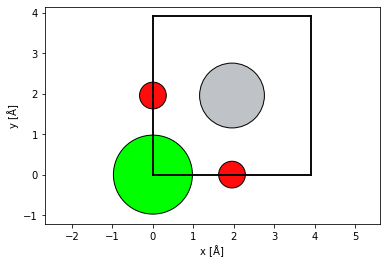

The default ASE gui, an interactive 3d viewer, may be started using the `view` function. However, the standard gui backend does not work in remote environments, hence, we instead use the ASE interface to [nglview](https://github.com/nglviewer/nglview).

Nglview can render a static image for outside use.

## Manipulating the atoms <a id='manipulating'></a>
abTEM always assumes that the imaging electrons propagate along the $z$-axis in the direction from _negative to positive_ coordinate values. Hence, to choose the zone axis, we need to manipulate the atoms so they are properly aligned.

ASE has a large number of tools for manipulating imported structures, so we can't cover all of them here. We will look at the `surface` function, which can be used for creating a periodic surface (aligned with the $z$-axis) with a given set of Miller indices.

Here we orient the strontium titanate structure along the (110)-direction.

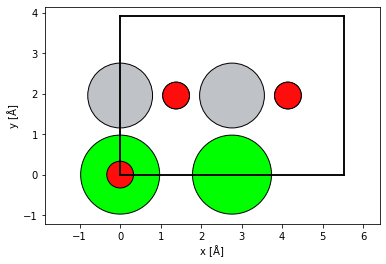

Simulations may require a larger crystal, to repeat the atoms by 2 in $x$, 3 in $y$ and 10 in the $z$-direction, we just multiply the atoms.

The positions and atomic numbers are just `numpy` arrays and hence can be modified in-place. Here, we randomly substitutionally dope the structures by making the titanium atoms into indium atoms with a probability of 10 %.  

Next, we center the atoms in the cell and add 5 Å of vacuum at the entrance and exit surfaces along the $z$-axis.

## Exporting structures to files <a id='exporting_structures'></a>

The structure can be exported in all the common atomic structure formats. Here, we export the manipulated structure as `.cif`, so we can use it in the next tutorial. 

C:\Users\jacob\anaconda3\envs\hspy_env\lib\site-packages\ase\io\cif.py:787: UserWarning: Occupancies present but no occupancy info for "{symbol}"
  warnings.warn(str(err))


## Orthogonal and periodic supercells <a id='orthogonal'></a>

The multislice algorithm requires an orthogonal periodic atomic structure as its input. However, taking any arbitrary structure and making it periodic and orthogonal is not always trivial. abTEM has a tool for solving this problem.

To demonstrate the tool, we import a graphene structure with the minimal hexagonal unit cell. 

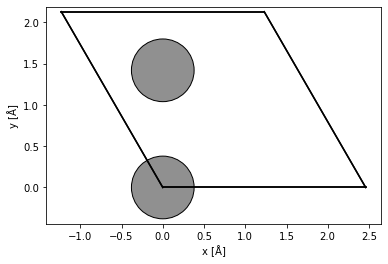

Applying `orthogonalize_cell` we find the smallest orthogonal version of a cell. 

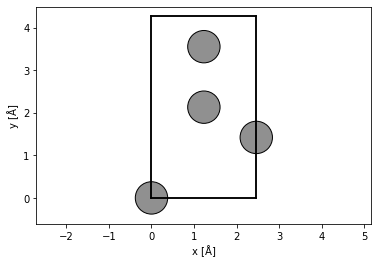

The problem of creating orthogonal cells is not always as trivial for graphene. For those interested in more advanced uses of the `orthogonalize_cell` function, we have a [tutorial](https://abtem.readthedocs.io/en/latest/tutorials/orthogonal_cells.html) dedicated to the subject.

## Example: Nanoparticle on amorphous carbon <a id='nanoparticle'></a>

As a final example, we create a model of a gold nanoparticle on amorphous carbon. 

A rough model of the carbon substrate is created by taking a diamond crystal and randomly displacing the atoms. The [`bulk`](https://wiki.fysik.dtu.dk/ase/ase/build/build.html#common-bulk-crystals) function can create common bulk crystal structures. 

ASE has modules for procedurally generating special structures such as [carbon nanotubes](https://wiki.fysik.dtu.dk/ase/ase/build/build.html#nanotubes) and [nanoparticles](https://wiki.fysik.dtu.dk/ase/ase/cluster/cluster.html). Here, we will use the `Decahedron` function to create a Decahedral gold nanoparticle. The nanoparticle is then rotated 30 degrees around the $x$-axis.

The nanoparticle is moved to the top center of the carbon structure using the `translate` method.

The nanoparticle and amourphous substrate is combined in a single model by simply adding them together.

Then the combined structure is centered along the $z$-axis, and the supercell is adjusted such that there is a vacuum of 2 Å on the top and bottom of the model.

Finally, the model is written to disk and shown using `nglview`.